In [2]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)
DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
After performing a ttest our test variabzle is -11.862852780650169, and the p value is 4.972721571759431e-29, indicating there is a significant differnce between the mean of the first population and the second population.


'The differnce in means at the 95 percent confidence interval is between 4762.357881483982 and -4762.357881483982'

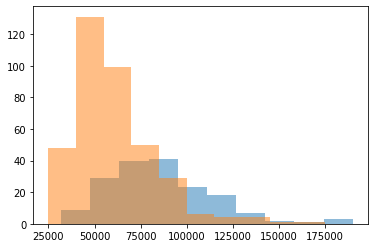

In [48]:
'''
Null Hypthoesis: Ho: u1 - u2 = 0
On average, there is no significant differnce between the sale price of houses with airconditioning
and houses without air conditioning. The first population mean is equal to the second population mean.

Alternative Hypothesis: Ha: u1 - u2 != 0
On average there is a significant difference between the sale price of houses with ariconditiong
and houses without air condition. The first population mean is not equal to the second population mean.
'''

#Read CSV file
housing = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv')

#Filter into two data sets, with and without air
no_air = housing['airco'] == 'no'
air = housing['airco'] == 'yes'
housing_no_air = housing.iloc[no_air.values]
housing_air = housing.iloc[air.values]

#Show that both data sets are normal.
plt.hist(housing_air['price'], alpha = .5)
plt.hist(housing_no_air['price'], alpha = .5)
print(stats.describe(housing_no_air['price']))
print(stats.describe(housing_air['price']))

#Perform t-test
ttest_results = stats.ttest_ind(housing_no_air['price'], housing_air['price'])
print('After performing a ttest our test variabzle is {}, and the p value is {}, indicating there is a significant differnce between the mean of the first population and the second population.'.format(ttest_results[0], ttest_results[1]))

#Find condfidence interval
def find_ci(data_1, data_2):
    sample_1_n = data_1.shape[0]
    sample_2_n = data_2.shape[0]
    sample_1_mean = data_1.mean()
    sample_2_mean = data_2.mean()
    sample_1_var = data_1.var()
    sample_2_var = data_2.var()
    mean_diff = sample_2_mean - sample_2_mean
    std_err_diff = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_diff
    ci_upper = mean_diff + margin_of_error
    ci_lower = mean_diff - margin_of_error
    return('The differnce in means at the 95 percent confidence interval is between {} and {}'.format(ci_upper, ci_lower))
find_ci(housing_air['price'], housing_no_air['price'])




DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)
After performing a ttest our test variabzle is 4.420628512286621, and the p value is 1.1885626562866786e-05, indicating there is a significant differnce between the mean of the first population and the second population.


'The differnce in means at the 95 percent confidence interval is between 2686.1839157569616 and -2686.1839157569616'

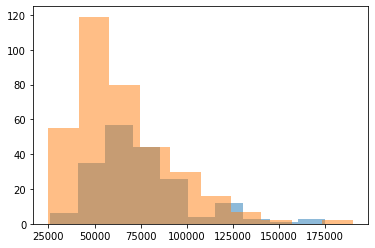

In [47]:
#Split up the data
basement_yes = housing['fullbase'] == 'yes'
basement_no = housing['fullbase'] == 'no'
housing_basement = housing.iloc[basement_yes.values]
housing_no_basement = housing.iloc[basement_no.values]

#Show that the data is normal
plt.hist(housing_basement['price'], alpha = .5)
plt.hist(housing_no_basement['price'], alpha = .5)
print(stats.describe(housing_basement['price']))
print(stats.describe(housing_no_basement['price']))

#Perform t-test
ttest_basement = stats.ttest_ind(housing_basement['price'], housing_no_basement['price'])
print('After performing a ttest our test variabzle is {}, and the p value is {}, indicating there is a significant differnce between the mean of the first population and the second population.'.format(ttest_basement[0], ttest_basement[1]))

#Find confidence interval
find_ci(housing_basement['price'], housing_no_basement['price'])